In [ ]:
'''
This is the visualization tools for stored scores dictribution.
Please refer to the original paper "Improving Contrastive Learning by Visualizing Feature Transformation" for details.

Our visualization is offline, which almost does not affect the training speed.
Instead of storing K (65536) pair scores, we save their statistical mean and variance to represent the scores’ distribution. 
You can refer to the original paper and supplementary for the details.
If it is useful, please cite us.


@inproceedings{zhu2021Improving,
  title={Improving Contrastive Learning by Visualizing Feature Transformation},
  author={Zhu, Rui and Zhao, Bingchen and Liu, Jingen and Sun, Zhenglong and Chen, Chang Wen},
  booktitle =  {Proceedings of the IEEE/CVF International Conference on Computer Vision (ICCV)},
  year={2021}
}


'''



In [2]:
'''
This is the codes for parsing scores.
We store scores of each epoch in one file to prevent too much small files to affect I/O.

'''

import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import axes3d

def parsing_epoch(filePath):
    dirlist=os.listdir(filePath)
    dirlist.sort()
    filelist=[]
    for i in dirlist:
        filelist.append(np.load(filePath+i,allow_pickle=True))

    var=[]
    mean=[]
    posmean=[]
    posvar=[]
    for i in range(len(filelist)):
        for j in range(len(filelist[i])):
            var.append(filelist[i][j][:,1].mean())
            mean.append(filelist[i][j][:,0].mean())
            posmean.append(filelist[i][j][:,2].mean())
            posvar.append(filelist[i][j][:,2].var())

    return var,mean,posmean,posvar

In [3]:
'''
If you need to visualize the  exp score, you  cna use this parsing tool.

'''

def parsing_epoch_exp(filePath):
    dirlist=os.listdir(filePath)
    dirlist.sort()
    filelist=[]
    for i in dirlist:
        filelist.append(np.load(filePath+i,allow_pickle=True))
    
    var=[]
    mean=[]
    posmean=[]
    posvar=[]
    exp_neg=[]
    exp_pos=[]
    for i in range(len(filelist)):
        for j in range(len(filelist[i])):
            var.append(filelist[i][j][:,1].mean())
            mean.append(filelist[i][j][:,0].mean())
            posmean.append(filelist[i][j][:,2].mean())
            exp_neg.append(filelist[i][j][:,3].mean())
            exp_pos.append(filelist[i][j][:,4].mean())

    return var,mean,posmean,exp_neg,exp_pos

In [ ]:
'''
Parsing score from your score path

'''
score_t007_m1=parsing_epoch('/your/path/to/zhur5/pycontrast/save_t007m/m1/scores/')
score_t007_m0999=parsing_epoch('/your/path/to/zhur5/pycontrast/save_t007m/m0999/scores/')
score_t007_m099=parsing_epoch('/your/path/to/zhur5/pycontrast/save_t007m/m099/scores/')
score_t007_m09=parsing_epoch('/your/path/to/zhur5/pycontrast/save_t007m/m09/scores/')
score_t007_m08=parsing_epoch('/your/path/to/zhur5/pycontrast/save_t007m/m08/scores/')
score_t007_m07=parsing_epoch('/your/path/to/zhur5/pycontrast/save_t007m/m07/scores/')
score_t007_m06=parsing_epoch('/your/path/to/zhur5/pycontrast/save_t007m/m06/scores/')
score_t007_m05=parsing_epoch('/your/path/to/zhur5/pycontrast/save_t007m/m05/scores/')
score_t007_m04=parsing_epoch('/your/path/to/zhur5/pycontrast/save_t007m/m04/scores/')

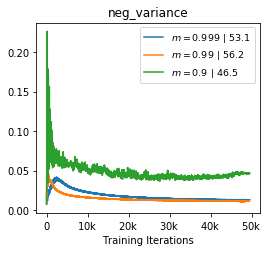

In [20]:
'''
2D view score

'''
plt.figure(figsize=(4,3.5))
b=0
x=range(len(score_t007_m1[1][b:49500]))
x_labels=[0, 10000, 20000, 30000, 40000,50000]
labels=[r'$0$', r'$10$k', r'$20$k', r'$30$k', r'$40$k',r'$50$k']

#plt.plot(x,score_t007_m1[0][b:49500])
plt.plot(x,score_t007_m0999[0][b:49500])
plt.plot(x,score_t007_m099[0][b:49500])
plt.plot(x,score_t007_m09[0][b:49500])
plt.xticks(x_labels,labels)
#plt.axvline(x=29700,ls="--",c="gray")
#plt.axvline(x=39600,ls="--",c="gray")
plt.xlabel('Training Iterations')
plt.title("neg_variance")
plt.legend(loc='best',labels=[r'$m=0.999$ | 53.1 ',r'$m=0.99$ | 56.2',r'$m=0.9$ | 46.5 '],fontsize=9.5)
plt.savefig('t007_2d_negvar.pdf',bbox_inches='tight', dpi=200)

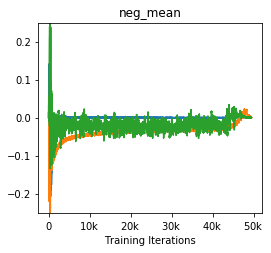

In [14]:
plt.figure(figsize=(4,3.5))
b=0
x=range(len(score_t007_m1[1][b:49500]))
x_labels=[0, 10000, 20000, 30000, 40000,50000]
labels=[r'$0$', r'$10$k', r'$20$k', r'$30$k', r'$40$k',r'$50$k']

#plt.plot(x,score_t007_m1[1][b:49500])
plt.plot(x,score_t007_m0999[1][b:49500])
plt.plot(x,score_t007_m099[1][b:49500])
plt.plot(x,score_t007_m09[1][b:49500])
plt.xticks(x_labels,labels)
#plt.axvline(x=29700,ls="--",c="gray")
#plt.axvline(x=39600,ls="--",c="gray")
plt.ylim(-0.25,0.25)
plt.xlabel('Training Iterations')
plt.title("neg_mean")
plt.savefig('t007_2d_negmean.pdf',bbox_inches='tight', dpi=200)

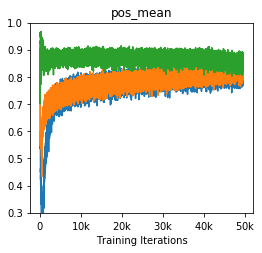

In [19]:
plt.figure(figsize=(4,3.5))
b=0
x=range(len(score_t007_m1[1][b:49500]))
x_labels=[0, 10000, 20000, 30000, 40000,50000]
labels=[r'$0$', r'$10$k', r'$20$k', r'$30$k', r'$40$k',r'$50$k']

#plt.plot(x,score_t007_m1[2][b:49500])
plt.plot(x,score_t007_m0999[2][b:49500])
plt.plot(x,score_t007_m099[2][b:49500])
plt.plot(x,score_t007_m09[2][b:49500])
plt.xticks(x_labels,labels)
#plt.axvline(x=500,ls="--",c="gray")
#plt.axvline(x=29700,ls="--",c="gray")
#plt.axvline(x=39600,ls="--",c="gray")
plt.xlabel('Training Iterations')
plt.title("pos_mean")
plt.ylim(0.3,1)
plt.savefig('t007_2d_posmean.pdf',bbox_inches='tight', dpi=200)

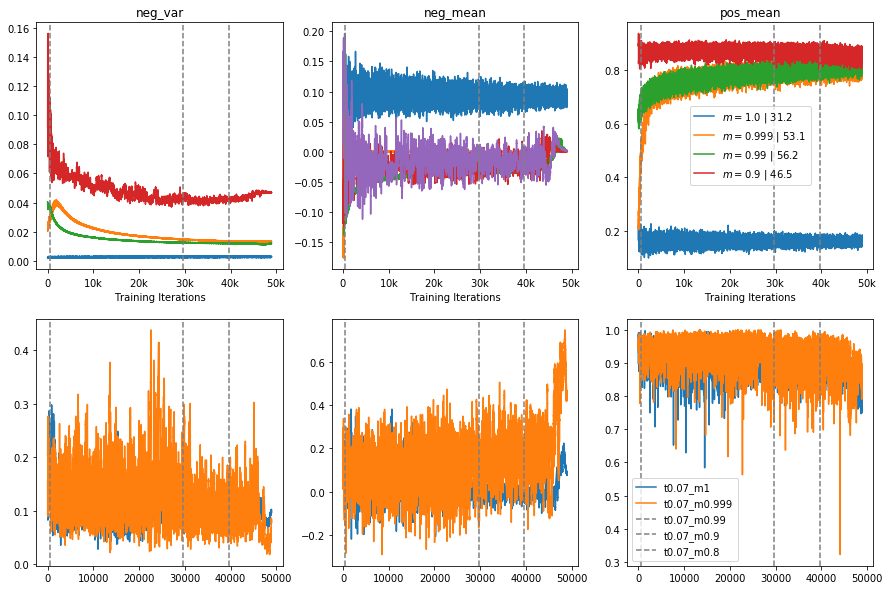

In [162]:
subplots= plt.subplots(2, 3, figsize=(15,10))
[ax1, ax2,ax3]=subplots[1][0]
[ax4,ax5,ax6]=subplots[1][1]
b=550
x=range(len(score_t007_m1[1][b:49500]))

#ax1.set_zlim3d(0,1)
ax1.plot(x,score_t007_m1[0][b:49500])
ax1.plot(x,score_t007_m0999[0][b:49500])
ax1.plot(x,score_t007_m099[0][b:49500])
ax1.plot(x,score_t007_m09[0][b:49500])
#ax1.plot(x,score_t007_m08[0])
#ax1.plot(x,score_t007_m07[0])
#ax1.plot(x,score_t007_m06[0])
#ax1.plot(x,score_t007_m05[0])
#ax1.plot(x,score_t007_m04[0])
ax1.set_xticks([0, 10000, 20000, 30000, 40000,50000])
ax1.set_xticklabels([r'$0$', r'$10$k', r'$20$k', r'$30$k', r'$40$k',r'$50$k'])
ax1.axvline(x=500,ls="--",c="gray")
ax1.axvline(x=29700,ls="--",c="gray")
ax1.axvline(x=39600,ls="--",c="gray")
ax1.set_xlabel('Training Iterations')
#ax1.legend(loc='best',labels=['t0.07_m1','t0.07_m0.999','t0.07_m0.99','t0.07_m0.9','t0.07_m0.8','t0.07_m0.7','t0.07_m0.6','t0.07_m0.5','t0.07_m0.4'])
ax1.set_title("neg_var")


#ax2.set_ylim(-0.05,0.1)
ax2.plot(x,score_t007_m1[1][b:49500])
ax2.plot(x,score_t007_m0999[1][b:49500])
ax2.plot(x,score_t007_m099[1][b:49500])
ax2.plot(x,score_t007_m09[1][b:49500])
ax2.plot(x,score_t007_m08[1][b:49500])
#ax2.plot(x,score_t007_m07[1])
#ax2.plot(x,score_t007_m06[1])
#ax2.plot(x,score_t007_m05[1])
#ax2.plot(x,score_t007_m04[1])
ax2.set_xticks([0, 10000, 20000, 30000, 40000,50000])
ax2.set_xticklabels([r'$0$', r'$10$k', r'$20$k', r'$30$k', r'$40$k',r'$50$k'])
ax2.axvline(x=500,ls="--",c="gray")
ax2.axvline(x=29700,ls="--",c="gray")
ax2.axvline(x=39600,ls="--",c="gray")
ax2.set_xlabel('Training Iterations')
#ax2.legend(loc='best',labels=['t0.07_m1','t0.07_m0.999','t0.07_m0.99','t0.07_m0.9','t0.07_m0.8','t0.07_m0.7','t0.07_m0.6', 't0.07_m0.5','t0.07_m0.4'])
ax2.set_title("neg_mean")

#ax3.set_zlim3d(0,0.075)
ax3.plot(x,score_t007_m1[2][b:49500])
ax3.plot(x,score_t007_m0999[2][b:49500])
ax3.plot(x,score_t007_m099[2][b:49500])
ax3.plot(x,score_t007_m09[2][b:49500])
#ax3.plot(x,score_t007_m08[2])
#ax3.plot(x,score_t007_m07[2])
#ax3.plot(x,score_t007_m06[2])
#ax3.plot(x,score_t007_m05[2])
#ax3.plot(x,score_t007_m04[2])
ax3.set_xticks([0, 10000, 20000, 30000, 40000,50000])
ax3.set_xticklabels([r'$0$', r'$10$k', r'$20$k', r'$30$k', r'$40$k',r'$50$k'])
ax3.axvline(x=500,ls="--",c="gray")
ax3.axvline(x=29700,ls="--",c="gray")
ax3.axvline(x=39600,ls="--",c="gray")
ax3.set_xlabel('Training Iterations')
ax3.legend(loc='best',labels=[r'$m=1.0$ | 31.2',r'$m=0.999$ | 53.1 ',r'$m=0.99$ | 56.2',r'$m=0.9$ | 46.5 '],fontsize=10)
ax3.set_title("pos_mean")


#ax4.set_zlim3d(0,1)
#ax4.plot(x,score_t007_m07[0])
ax4.plot(x,score_t007_m06[0][b:49500])
#ax4.plot(x,score_t007_m05[0])
ax4.plot(x,score_t007_m04[0][b:49500])
ax4.axvline(x=500,ls="--",c="gray")
ax4.axvline(x=29700,ls="--",c="gray")
ax4.axvline(x=39600,ls="--",c="gray")
#ax4.legend(loc='best',labels=['t0.07_m1','t0.07_m0.999','t0.07_m0.99','t0.07_m0.9','t0.07_m0.8','t0.07_m0.7','t0.07_m0.6','t0.07_m0.5','t0.07_m0.4'])
#ax4.set_title("neg_var")

#ax5.set_zlim3d(0,1.0)
#ax5.plot(x,score_t007_m07[1])
ax5.plot(x,score_t007_m06[1][b:49500])
#ax5.plot(x,score_t007_m05[1])
ax5.plot(x,score_t007_m04[1][b:49500])
ax5.axvline(x=500,ls="--",c="gray")
ax5.axvline(x=29700,ls="--",c="gray")
ax5.axvline(x=39600,ls="--",c="gray")
#ax5.legend(loc='best',labels=['t0.07_m1','t0.07_m0.999','t0.07_m0.99','t0.07_m0.9','t0.07_m0.8','t0.07_m0.7','t0.07_m0.6', 't0.07_m0.5','t0.07_m0.4'])
#ax5.set_title("neg_mean")

#ax3.set_zlim3d(0,0.075)
#ax6.plot(x,score_t007_m07[2])
ax6.plot(x,score_t007_m06[2][b:49500])
#ax6.plot(x,score_t007_m05[2])
ax6.plot(x,score_t007_m04[2][b:49500])
ax6.axvline(x=500,ls="--",c="gray")
ax6.axvline(x=29700,ls="--",c="gray")
ax6.axvline(x=39600,ls="--",c="gray")
ax6.legend(loc='best',labels=['t0.07_m1','t0.07_m0.999','t0.07_m0.99','t0.07_m0.9','t0.07_m0.8','t0.07_m0.7','t0.07_m0.6',
                              't0.07_m0.5','t0.07_m0.4'])
#ax3.set_title("pos_mean")


plt.show()

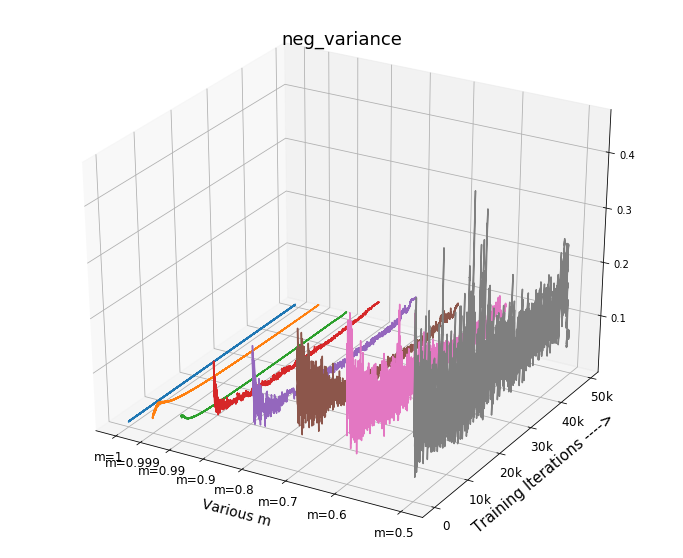

In [138]:
'''
3D view score

'''

from mpl_toolkits.mplot3d.axes3d import Axes3D


fig= plt.figure(figsize=(12,10))

ax1 = fig.gca(projection='3d')

a=0
b=550
neg_mean1=[]
neg_mean1.append(score_t007_m1[a][b:49500])
neg_mean1.append(score_t007_m0999[a][b:49500])
neg_mean1.append(score_t007_m099[a][b:49500])
neg_mean1.append(score_t007_m09[a][b:49500])
neg_mean1.append(score_t007_m08[a][b:49500])
neg_mean1.append(score_t007_m07[a][b:49500])
neg_mean1.append(score_t007_m06[a][b:49500])
neg_mean1.append(score_t007_m05[a][b:49500])
#neg_mean1.append(score_t007_m04[a][b:49500])
neg_mean1=np.array(neg_mean1) 




#zs = range(0,3*len(neg_mean),3)
zs=[1,12,25,40,57,76,97,125]
zs_label=['m=1', 'm=0.999', 'm=0.99', 'm=0.9', 'm=0.8','m=0.7','m=0.6','m=0.5']

ys=[0, 10000, 20000, 30000, 40000,50000]
ys_label=[r'$0$', r'$10$k', r'$20$k', r'$30$k', r'$40$k',r'$50$k']


x = np.arange(0,len(score_t007_m1[a][b:49500]))

for i in range(len(zs)):
    
    ax1.plot3D(x,neg_mean1[i],zs = zs[i],zdir = 'x')
ax1.set_title("neg_variance",fontsize=18 )
#ax1.set_zlim(0,0.35)
ax1.set_xticks(zs)
ax1.set_xticklabels(zs_label,fontsize=12)
ax1.set_yticks(ys)
ax1.set_yticklabels(ys_label,fontsize=12)

ax1.set_ylabel('Training Iterations ---->',fontsize=15,labelpad=8.0)
ax1.set_xlabel('Various m',fontsize=14,labelpad=10.0)


plt.savefig('t007_3d_negvar.jpg',bbox_inches='tight', dpi=200)
plt.show()


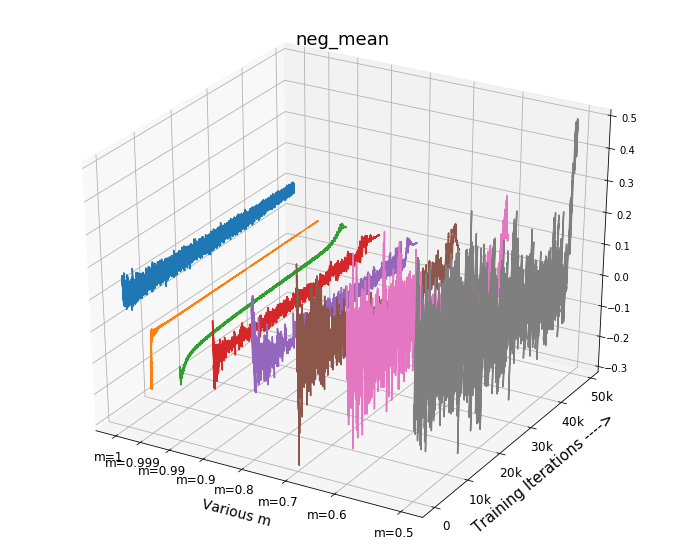

In [139]:
from mpl_toolkits.mplot3d.axes3d import Axes3D


fig= plt.figure(figsize=(12,10))

ax1 = fig.gca(projection='3d')

a=1
b=550
neg_mean1=[]
neg_mean1.append(score_t007_m1[a][b:49500])
neg_mean1.append(score_t007_m0999[a][b:49500])
neg_mean1.append(score_t007_m099[a][b:49500])
neg_mean1.append(score_t007_m09[a][b:49500])
neg_mean1.append(score_t007_m08[a][b:49500])
neg_mean1.append(score_t007_m07[a][b:49500])
neg_mean1.append(score_t007_m06[a][b:49500])
neg_mean1.append(score_t007_m05[a][b:49500])
#neg_mean1.append(score_t007_m04[a][b:49500])
neg_mean1=np.array(neg_mean1) 


#zs = range(0,3*len(neg_mean),3)
zs=[1,12,25,40,57,76,97,125]
zs_label=['m=1', 'm=0.999', 'm=0.99', 'm=0.9', 'm=0.8','m=0.7','m=0.6','m=0.5']

ys=[0, 10000, 20000, 30000, 40000,50000]
ys_label=[r'$0$', r'$10$k', r'$20$k', r'$30$k', r'$40$k',r'$50$k']


x = np.arange(0,len(score_t007_m1[a][b:49500]))

for i in range(len(zs)):
    
    ax1.plot3D(x,neg_mean1[i],zs = zs[i],zdir = 'x')
ax1.set_title("neg_mean",fontsize=18 )
#ax1.set_zlim(0,0.35)
ax1.set_xticks(zs)
ax1.set_xticklabels(zs_label,fontsize=12)
ax1.set_yticks(ys)
ax1.set_yticklabels(ys_label,fontsize=12)

ax1.set_ylabel('Training Iterations ---->',fontsize=15,labelpad=8.0)
ax1.set_xlabel('Various m',fontsize=14,labelpad=10.0)


plt.savefig('t007_3d_negmean.jpg',bbox_inches='tight', dpi=200)
plt.show()


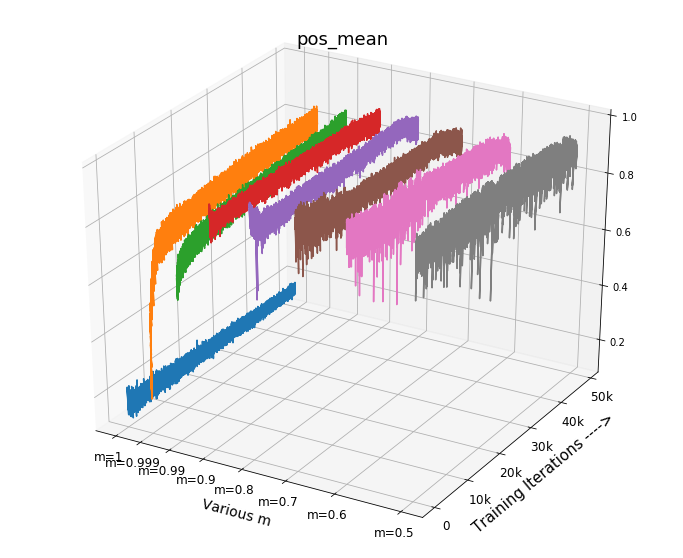

In [140]:
from mpl_toolkits.mplot3d.axes3d import Axes3D


fig= plt.figure(figsize=(12,10))

ax1 = fig.gca(projection='3d')

a=2
b=550
neg_mean1=[]
neg_mean1.append(score_t007_m1[a][b:49500])
neg_mean1.append(score_t007_m0999[a][b:49500])
neg_mean1.append(score_t007_m099[a][b:49500])
neg_mean1.append(score_t007_m09[a][b:49500])
neg_mean1.append(score_t007_m08[a][b:49500])
neg_mean1.append(score_t007_m07[a][b:49500])
neg_mean1.append(score_t007_m06[a][b:49500])
neg_mean1.append(score_t007_m05[a][b:49500])
#neg_mean1.append(score_t007_m04[a][b:49500])
neg_mean1=np.array(neg_mean1) 




#zs = range(0,3*len(neg_mean),3)
zs=[1,12,25,40,57,76,97,125]
zs_label=['m=1', 'm=0.999', 'm=0.99', 'm=0.9', 'm=0.8','m=0.7','m=0.6','m=0.5']

ys=[0, 10000, 20000, 30000, 40000,50000]
ys_label=[r'$0$', r'$10$k', r'$20$k', r'$30$k', r'$40$k',r'$50$k']


x = np.arange(0,len(score_t007_m1[a][b:49500]))

for i in range(len(zs)):
    
    ax1.plot3D(x,neg_mean1[i],zs = zs[i],zdir = 'x')
ax1.set_title("pos_mean",fontsize=18 )
#ax1.set_zlim(0,0.35)
ax1.set_xticks(zs)
ax1.set_xticklabels(zs_label,fontsize=12)
ax1.set_yticks(ys)
ax1.set_yticklabels(ys_label,fontsize=12)

ax1.set_ylabel('Training Iterations ---->',fontsize=15,labelpad=8.0)
ax1.set_xlabel('Various m',fontsize=14,labelpad=10.0)


plt.savefig('t007_3d_posmean.jpg',bbox_inches='tight', dpi=200)
plt.show()
